In [21]:
import pandas as pd
import nltk
nltk.download('stopwords')
import PyPDF2 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import re
import os
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Choice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
file_path = 'Artigos/Pasztor 2016 (1).pdf'

os.listdir('Artigos')
with open(file_path, mode='rb') as f:
    reader = PyPDF2.PdfFileReader(f)
    number_of_pages = reader.getNumPages()
    text = ''
    for i in range(number_of_pages - 5):
        page = reader.getPage(i)
        text += page.extractText()

#### Análise por cada palavra

In [3]:
words = text.split() #testar com word_vectorizer

#Colocar todas as palavras minúsculas
words = [x.lower() for x in words]

#Retirar pontuações
words = [re.sub('[,\.!?()]', '', x) for x in words]

#Retirar Stopwords
stop_words = set(stopwords.words('english'))
words = [x for x in words if x not in stop_words]

#Retirar números
words = [x for x in words if not re.search("\d", x)]

In [14]:
df = pd.DataFrame(words, columns = ['words'])

In [16]:
count_data = count_vectorizer.fit_transform(df['words'])

<4775x1898 sparse matrix of type '<class 'numpy.int64'>'
	with 4481 stored elements in Compressed Sparse Row format>

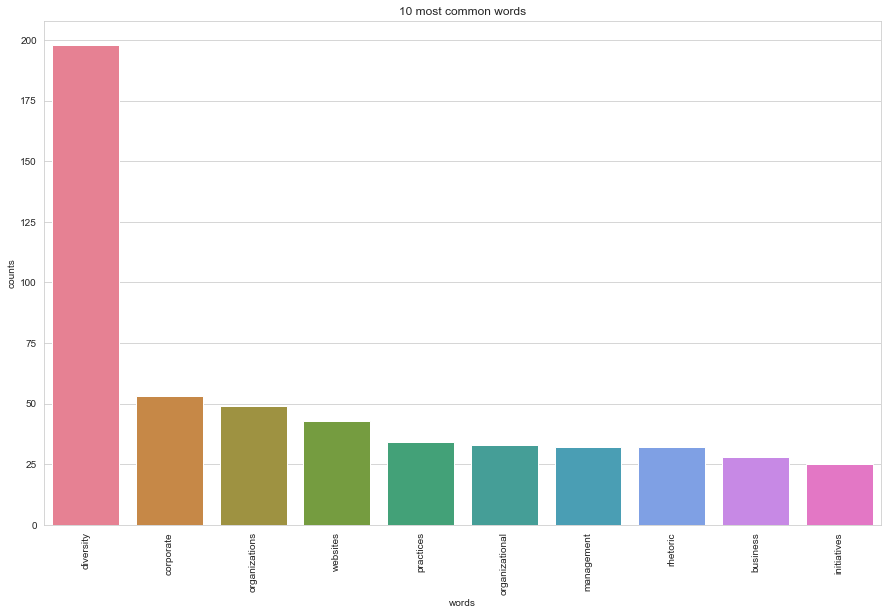

In [20]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['words'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [23]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 3
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
diversity websites rhetoric companies research

Topic #1:
corporate organizations practices business external

Topic #2:
organizational management initiatives diversityinc employees


#### Análise por frases